In [15]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

2021-12-19 15:43:45.170678: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/travis/anaconda3/envs/3d/lib/python3.8/site-packages/cv2/../../lib64:
2021-12-19 15:43:45.170723: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [4]:
# Get Cropping Coordinates


# importing the module
import cv2

cropping_cords = []

# function to display the coordinates of
# of the points clicked on the image
def click_event(event, x, y, flags, params):
    global cropping_cords
 
    # checking for left mouse clicks
    if event == cv2.EVENT_LBUTTONDOWN:
 
        # displaying the coordinates
        # on the Shell
        print(x, ' ', y)
 
        # displaying the coordinates
        # on the image window
        font = cv2.FONT_HERSHEY_SIMPLEX
        cv2.putText(img, str(x) + ',' +
                    str(y), (x,y), font,
                    1, (255, 0, 0), 2)
        cv2.imshow('image', img)

        cropping_cords = [x,y]

 

 
# reading the image
img = cv2.imread('/home/travis/repos/youtube_videos/screen_input_classification_labeling/screenshots/frame190_0.jpg', 1)

# displaying the image
cv2.imshow('image', img)

# setting mouse handler for the image
# and calling the click_event() function
test = cv2.setMouseCallback('image', click_event)

# wait for a key to be pressed to exit
cv2.waitKey(0)

# close the window
cv2.destroyAllWindows()

434   218


In [13]:
# Dataset preparation
import glob
import shutil
import os
import matplotlib.pyplot as plt

images = glob.glob('./screenshots/*.jpg')

print(images[0])

for i in images:
    label = i.split('_')[-1].replace('.jpg', '')
    label_file = os.path.join('screenshots', label)
    if not os.path.exists(label_file):
        os.mkdir(label_file)

    img = cv2.imread(i)
    crop_img = img[0:cropping_cords[1], 0:cropping_cords[0]]

    # plt.imshow(crop_img)

    cv2.imwrite(os.path.join(label_file, os.path.join(os.path.basename(i))), crop_img)
    # shutil.copy(i,os.path.join(label_file, os.path.join(os.path.basename(i))) )
    



./screenshots/frame559_0.jpg


In [16]:
# dataset load
data_dir = './screenshots'

batch_size = 32
crop_img.shape

train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
#   image_size=(img_height, img_width),
  batch_size=batch_size)

Found 4993 files belonging to 13 classes.
Using 3995 files for training.


2021-12-19 15:43:49.993984: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-19 15:43:49.994726: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/travis/anaconda3/envs/3d/lib/python3.8/site-packages/cv2/../../lib64:
2021-12-19 15:43:49.994971: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/travis/anaconda3/envs/3d/lib/python3.8/site-packages/cv2/../../lib64:
2021-12-19 15:43:49.995048: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.

In [35]:


val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  # image_size=(256,256),
  batch_size=batch_size)

Found 4993 files belonging to 13 classes.
Using 998 files for validation.


In [17]:
class_names = train_ds.class_names
print(class_names)

['0', '1', '12', '123', '13', '14', '2', '23', '234', '24', '3', '34', '4']


2021-12-19 15:43:55.562104: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 25165824 exceeds 10% of free system memory.


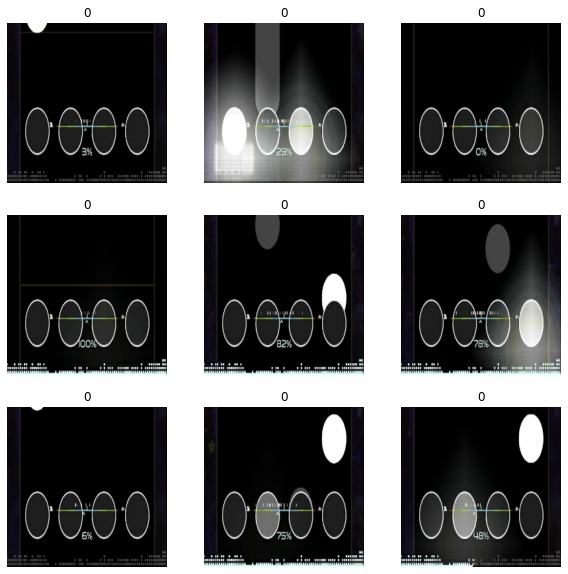

In [18]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [19]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

2021-12-19 15:44:31.310996: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 25165824 exceeds 10% of free system memory.


(32, 256, 256, 3)
(32,)


In [21]:
normalization_layer = layers.Rescaling(1./255)


In [22]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

2021-12-19 15:45:42.550037: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 25165824 exceeds 10% of free system memory.
2021-12-19 15:45:42.582778: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 25165824 exceeds 10% of free system memory.
2021-12-19 15:45:42.606414: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 25165824 exceeds 10% of free system memory.


0.0 1.0


In [37]:
num_classes = len(class_names)

print(crop_img.shape)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(256,256, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

(218, 434, 3)


In [40]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [41]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 256, 256, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 128, 128, 16)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 128, 128, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 64, 64, 64)       

In [42]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
125/125 [==============================] - 195s 2s/step - loss: 0.9577 - accuracy: 0.7011 - val_loss: 0.7312 - val_accuracy: 0.7194
Epoch 2/10
125/125 [==============================] - 178s 1s/step - loss: 0.6503 - accuracy: 0.7582 - val_loss: 0.6135 - val_accuracy: 0.7645
Epoch 3/10
125/125 [==============================] - 182s 1s/step - loss: 0.5418 - accuracy: 0.7927 - val_loss: 0.5781 - val_accuracy: 0.7655
Epoch 4/10
125/125 [==============================] - 176s 1s/step - loss: 0.4802 - accuracy: 0.8120 - val_loss: 0.5779 - val_accuracy: 0.7846
Epoch 5/10
125/125 [==============================] - 169s 1s/step - loss: 0.4315 - accuracy: 0.8255 - val_loss: 0.5614 - val_accuracy: 0.7846
Epoch 6/10
125/125 [==============================] - 250s 2s/step - loss: 0.3862 - accuracy: 0.8463 - val_loss: 0.5749 - val_accuracy: 0.7786
Epoch 7/10
125/125 [==============================] - 242s 2s/step - loss: 0.3635 - accuracy: 0.8516 - val_loss: 0.5972 - val_accuracy: 0.8006

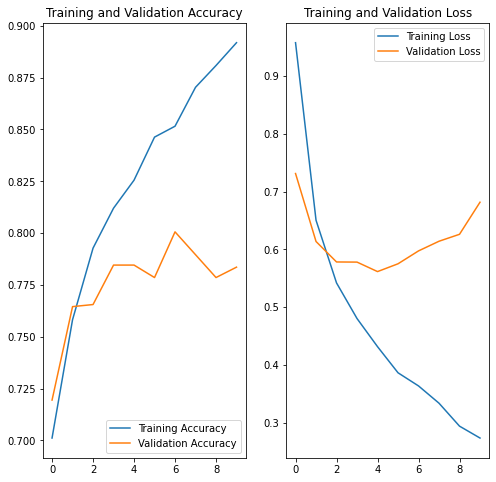

In [43]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()